In [6]:
library(httr)  # For making HTTP requests
library(jsonlite)  # For handling JSON data
library(cluster)
install.packages("proxy")
library(proxy)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘proxy’


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix




In [7]:
api_url <- "https://dog.ceo/api/breeds/list/all"
response <- GET(api_url)


In [8]:
# Check if the response is successful (status code 200)
if (status_code(response) == 200) {
  # Read the content of the response as text
  response_text <- content(response, "text")

  tryCatch({
    # Parse JSON response
    data <- fromJSON(response_text)

    # Print the parsed data
    print(data)
  }, error = function(e) {
    print("Error parsing JSON response:")
    print(e)
  })
} else {
  # Print error message
  print(paste("Error:", status_code(response), "-", response$status))
}


No encoding supplied: defaulting to UTF-8.



$message
$message$affenpinscher
list()

$message$african
list()

$message$airedale
list()

$message$akita
list()

$message$appenzeller
list()

$message$australian
[1] "shepherd"

$message$basenji
list()

$message$beagle
list()

$message$bluetick
list()

$message$borzoi
list()

$message$bouvier
list()

$message$boxer
list()

$message$brabancon
list()

$message$briard
list()

$message$buhund
[1] "norwegian"

$message$bulldog
[1] "boston"  "english" "french" 

$message$bullterrier
[1] "staffordshire"

$message$cattledog
[1] "australian"

$message$chihuahua
list()

$message$chow
list()

$message$clumber
list()

$message$cockapoo
list()

$message$collie
[1] "border"

$message$coonhound
list()

$message$corgi
[1] "cardigan"

$message$cotondetulear
list()

$message$dachshund
list()

$message$dalmatian
list()

$message$dane
[1] "great"

$message$deerhound
[1] "scottish"

$message$dhole
list()

$message$dingo
list()

$message$doberman
list()

$message$elkhound
[1] "norwegian"

$message$entlebuc

In [9]:
breed_counts <- sapply(data$message, length)
breed_df <- data.frame(Breed = names(breed_counts), Count = breed_counts)
print(breed_df)


                          Breed Count
affenpinscher     affenpinscher     0
african                 african     0
airedale               airedale     0
akita                     akita     0
appenzeller         appenzeller     0
australian           australian     1
basenji                 basenji     0
beagle                   beagle     0
bluetick               bluetick     0
borzoi                   borzoi     0
bouvier                 bouvier     0
boxer                     boxer     0
brabancon             brabancon     0
briard                   briard     0
buhund                   buhund     1
bulldog                 bulldog     3
bullterrier         bullterrier     1
cattledog             cattledog     1
chihuahua             chihuahua     0
chow                       chow     0
clumber                 clumber     0
cockapoo               cockapoo     0
collie                   collie     1
coonhound             coonhound     0
corgi                     corgi     1
cotondetulea

In [10]:
# Install and load necessary libraries
install.packages("dendextend")
library(dendextend)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘viridis’



---------------------
Welcome to dendextend version 1.17.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




In [11]:
hc <- hclust(dist(breed_df$Count))
dend <- as.dendrogram(hc)

In [12]:
dend

'dendrogram' with 2 branches and 98 members total, at height 23 

In [13]:
hc


Call:
hclust(d = dist(breed_df$Count))

Cluster method   : complete 
Distance         : Euclidean 
Number of objects: 98 


In [14]:
cosine_dist <- function(x, y) {
  1 - sum(x * y) / (sqrt(sum(x^2)) * sqrt(sum(y^2)))
}

In [15]:
breed_df$Count <- as.numeric(breed_df$Count)
str(breed_df)


'data.frame':	98 obs. of  2 variables:
 $ Breed: chr  "affenpinscher" "african" "airedale" "akita" ...
 $ Count: num  0 0 0 0 0 1 0 0 0 0 ...


In [16]:
dist_matrix <- dist(breed_df[-1], method = "cosine")


In [17]:
hc <- hclust(dist_matrix, method = "complete")


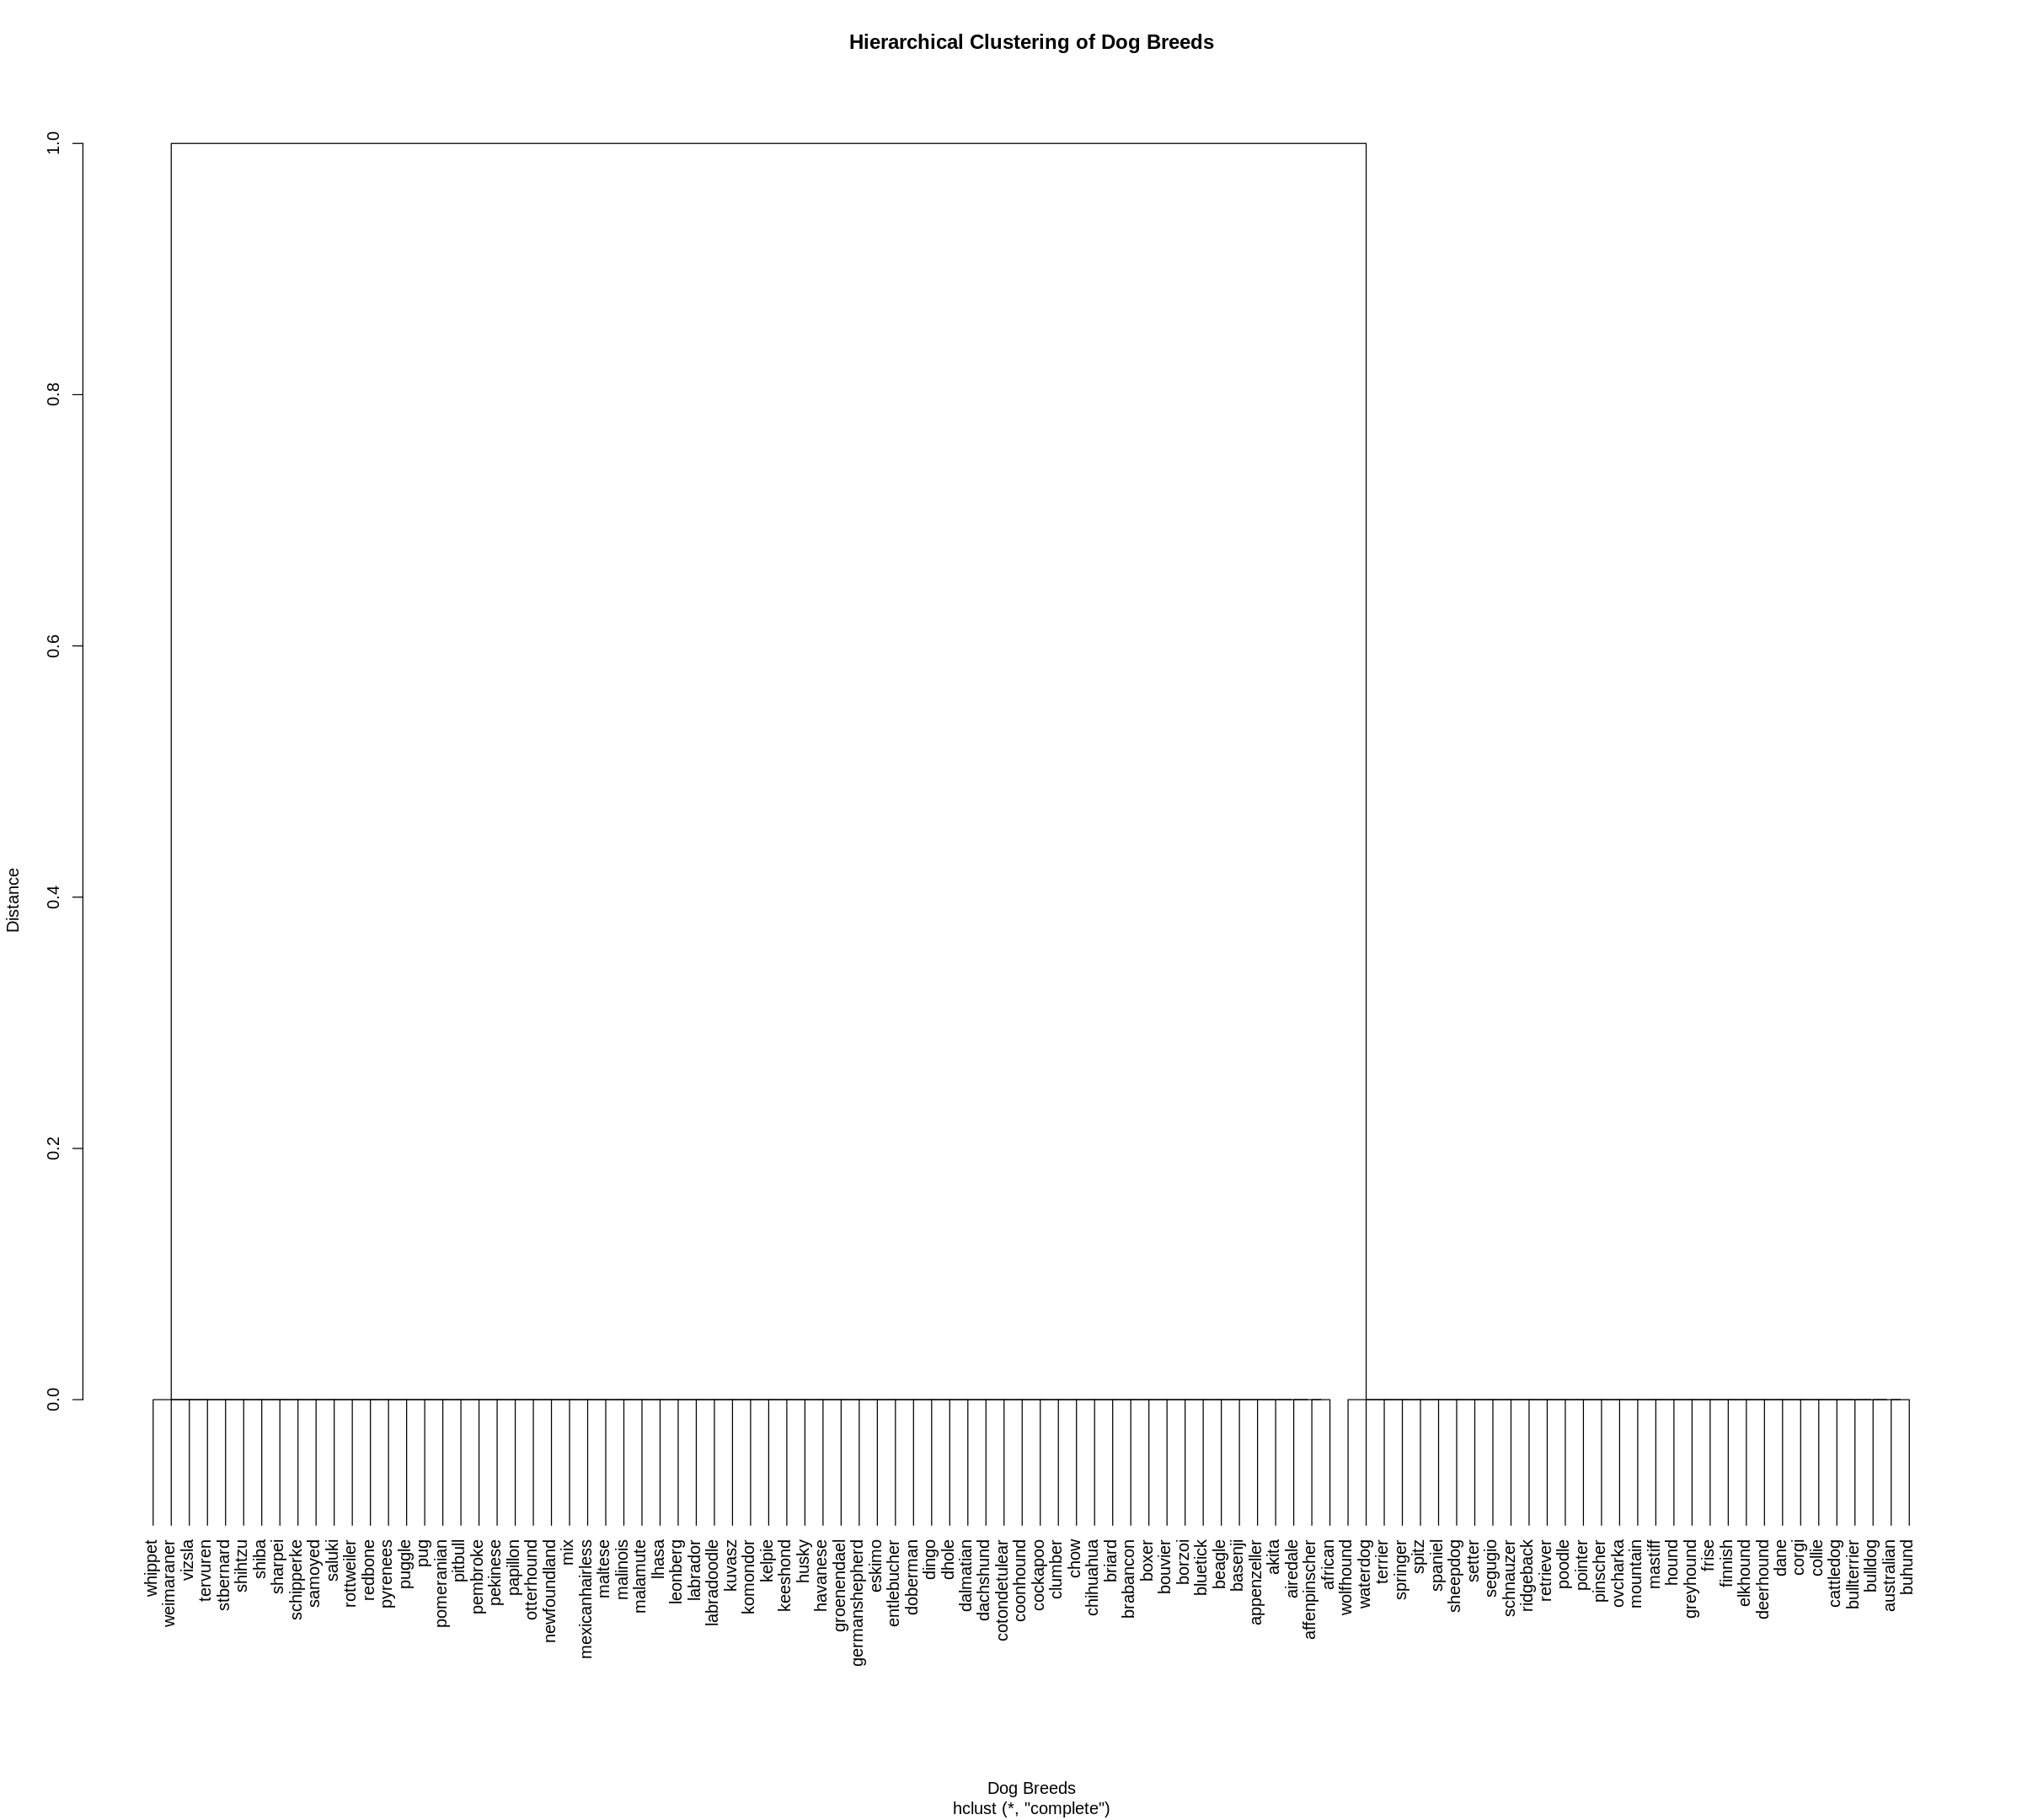

In [18]:
options(repr.plot.width = 20, repr.plot.height = 18)

plot(hc, main = "Hierarchical Clustering of Dog Breeds", xlab = "Dog Breeds", ylab = "Distance")


'data.frame':	117 obs. of  8 variables:
 $ Breed                 : chr  "Labrador Retriever" "German Shepherd" "Bulldog" "Poodle" ...
 $ Country.of.Origin     : chr  "Canada" "Germany" "England" "France" ...
 $ Fur.Color             : chr  "Yellow, Black, Chocolate" "Black, Tan" "White, Red" "White, Black, Brown, Apricot" ...
 $ Height..in.           : chr  "21-24" "22-26" "12-16" "10-15" ...
 $ Color.of.Eyes         : chr  "Brown" "Brown" "Brown" "Brown, Blue" ...
 $ Longevity..yrs.       : chr  "10-12" "7-10" "8-10" "12-15" ...
 $ Character.Traits      : chr  "Loyal, friendly, intelligent, energetic, good-natured" "Loyal, intelligent, protective, confident, trainable" "Loyal, calm, gentle, brave" "Intelligent, active, affectionate, hypoallergenic" ...
 $ Common.Health.Problems: chr  "Hip dysplasia, obesity, ear infections" "Hip dysplasia, elbow dysplasia, pancreatitis" "Skin allergies, respiratory issues, obesity" "Hip dysplasia, epilepsy, bladder stones" ...


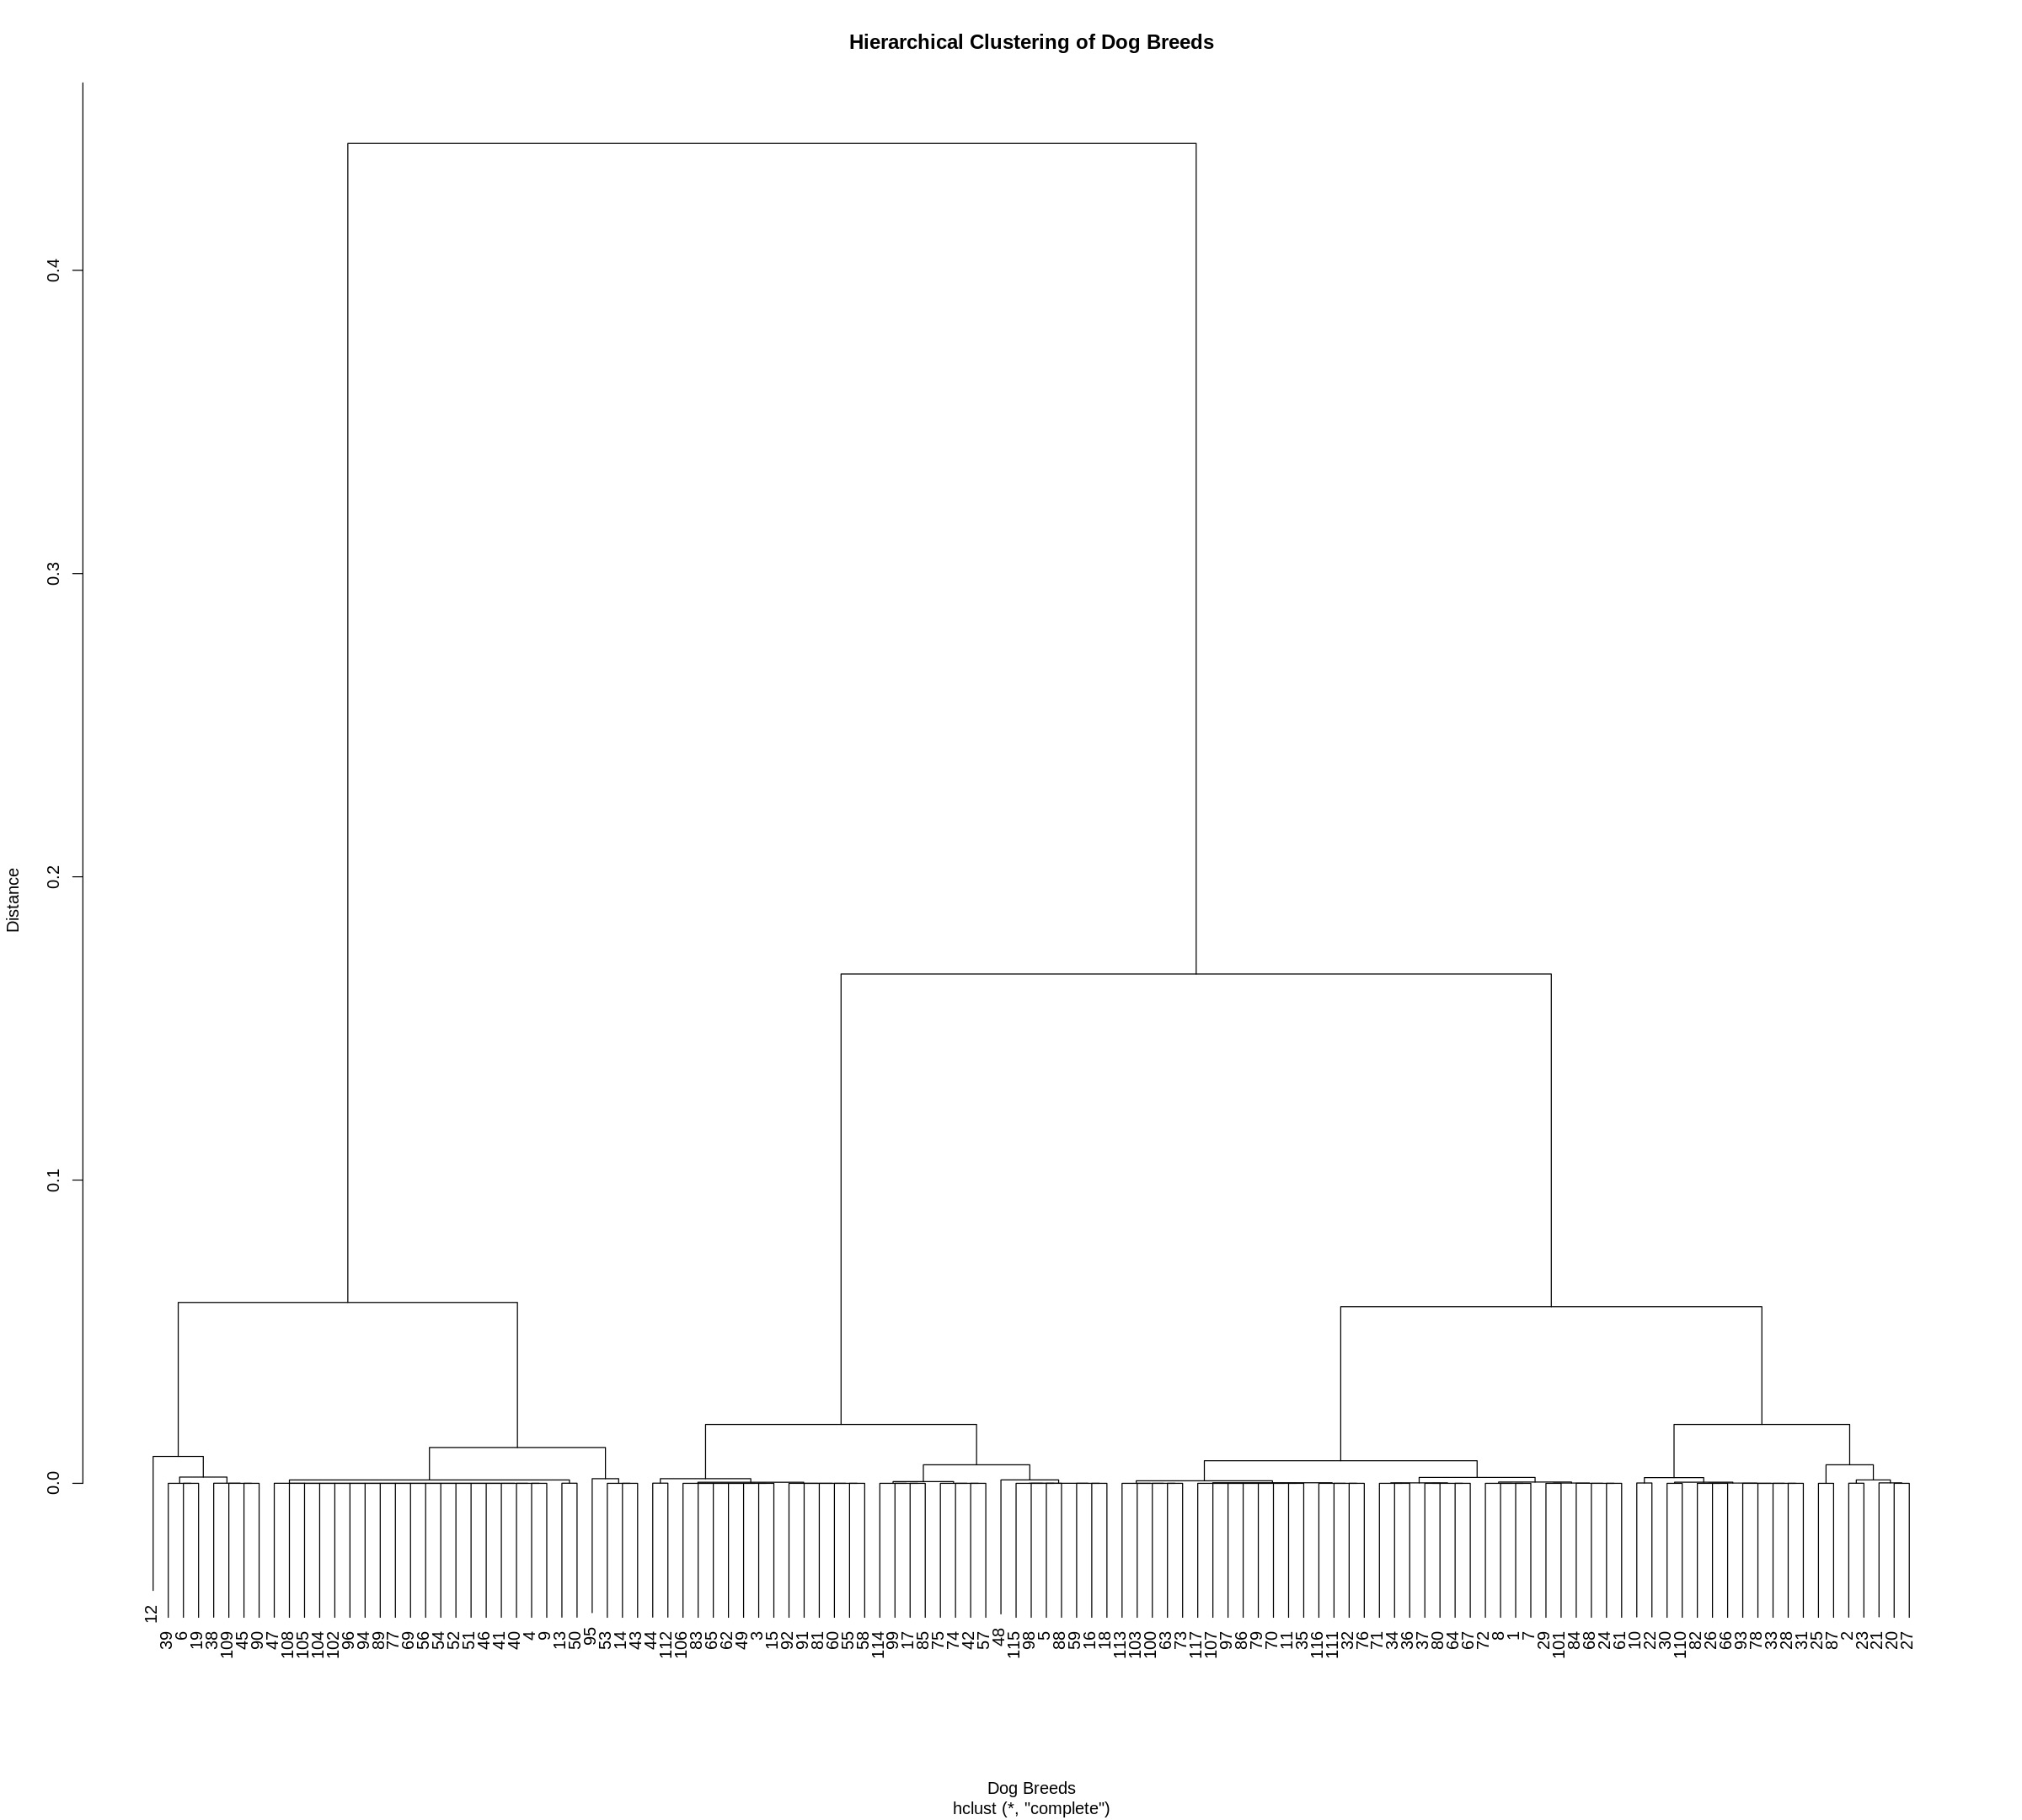

In [19]:
# Read the CSV file
breed_df <- read.csv("dog_breeds.csv")

# Check the structure of the dataframe
str(breed_df)

breed_df$Height <- sapply(strsplit(breed_df$Height..in., "-"), function(x) as.numeric(x[1]))
breed_df$Longevity <- sapply(strsplit(breed_df$Longevity..yrs., "-"), function(x) as.numeric(x[1]))
numeric_cols <- c("Height", "Longevity")

# Compute cosine distance
cosine_dist <- dist(breed_df[numeric_cols], method = "cosine")

# Perform hierarchical clustering
hc <- hclust(cosine_dist, method = "complete")

# Plot the dendrogram
plot(hc, main = "Hierarchical Clustering of Dog Breeds", xlab = "Dog Breeds", ylab = "Distance")



In [21]:
install.packages("arules")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Load required libraries
library(arules)
library(arulesViz)

# Read the dataset
df <- read.csv("dog_breeds.csv")

# Perform one-hot encoding to convert categorical variables into numerical format
df_encoded <- as(df, "transactions")

# Perform Apriori algorithm to find frequent itemsets
frequent_itemsets <- apriori(df_encoded, parameter = list(support = 0.1, confidence = 0.8, minlen = 2))

# Extract association rules from frequent itemsets
rules <- ruleInduction(frequent_itemsets)

# Display the association rules
inspect(head(rules, n = 20))


ERROR: Error in library(arulesViz): there is no package called ‘arulesViz’
